# Tarea 1

## Tarea 1.a
Graficar una función continua con sus respectivos polinomios de Bernstein (unas 4 o 5 polinomios).\
Escogemos la funcion: \
$f(x) = \begin{cases}
\frac{1-cos(x)}{x^2} &\text{ si } x\neq 0\\
\frac{1}{2} & \text{ si } x= 0
\end{cases}$

In [96]:
# Funcion factorial de un numero
def fact(n):
  fact = 1
  for i in range(1, n+1):
    fact = fact * i
  return fact

# Funcion continua a usar
def f(x):
  if x == 0:
    return 1/2
  else:
    return (1-cos(x) )/x**2

# Coeficiente del polonomio de Bernstein
def coef(f,k,n):
  comb = fact(n)/(fact(k)*fact(n-k))
  return f(k/n)*comb

In [97]:
# Retorna el polinomio de Bernstein
def bernstein(f, n):
  pol = 0
  x = symbols('x')
  for k in range(0,n+1):
    pol = pol + round(coef(f,k,n),3)* (x**k) * (1-x)**(n-k)
  # return np.sum([f(k / n) * binom(f,k, n) for k in np.arange(0, n + 1)])
  return pol

In [98]:
print("==================================== Resultados ====================================")
for n in [3,5,7,9]:
  print("El polinomio de Bernstein de grado ",n, "es: \n",expand(bernstein(f, n) ))

==================================== Resultados ====================================
El polinomio de Bernstein de grado  3 es: 
 0.001007080078125*x**3 - 0.0269775390625*x**2 - 0.014007568359375*x + 0.5
El polinomio de Bernstein de grado  5 es: 
 0.001007080078125*x**5 - 0.001007080078125*x**4 + 0.00201416015625*x**3 - 0.03399658203125*x**2 - 0.00799560546875*x + 0.5
El polinomio de Bernstein de grado  7 es: 
 4.57763671875e-5*x**7 + 0.001068115234375*x**6 - 0.002288818359375*x**5 + 0.00311279296875*x**4 - 0.0013427734375*x**3 - 0.0348663330078125*x**2 - 0.006011962890625*x + 0.5
El polinomio de Bernstein de grado  9 es: 
 0.00103759765625*x**9 - 0.000244140625*x**8 - 0.005218505859375*x**7 + 0.01385498046875*x**6 - 0.02099609375*x**5 + 0.019287109375*x**4 - 0.00958251953125*x**3 - 0.033966064453125*x**2 - 0.0050048828125*x + 0.5


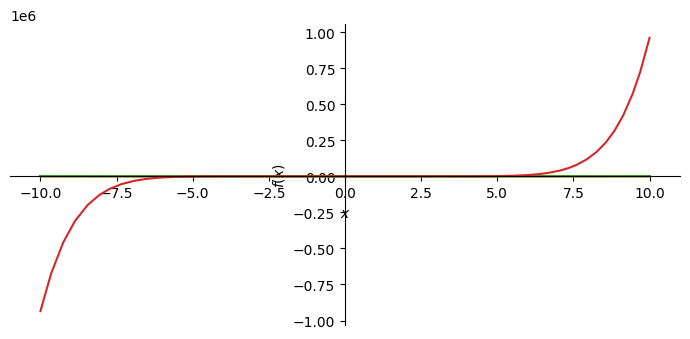

In [100]:
from sympy.plotting import plot
plot1 = plot(bernstein(f, 3),bernstein(f, 5),bernstein(f,7),bernstein(f,9))
plot1

## Tarea 1.b
Implementar el algoritmo de Casteljou para graficar la respectiva curva de Bezier.

In [105]:
import numpy as np
from sympy import plot_parametric, symbols, Symbol, Matrix,cos, expand

# ====================== Puntos ======================
p = np.array([[0,0],
              [0,2],
              [8,2],
              [4,0]])
# np = int(len(p)) # Numero de puntos

# ====================== Inicializacion ======================
#  Almacena la primera coordenada de los puntos que habllaremos
Px = np.zeros((4,4))
#  Almacena la segunda coordenada de los puntos que habllaremos
Py = np.zeros((4,4))
# Parametro t
t = 0.5
# Asignando la primera columna con los puntos de control
Px[0,:] = p[:,0]
Py[0,:] = p[:,1]

# Inicializando los polinomios P^r_i
PPx = Matrix(np.zeros((4,4)))
PPy = Matrix(np.zeros((4,4)))

# Asignando los primeros polinomios que son los puntos de control
PPx[0,:] = Matrix(np.array(p[:,0])).T
PPy[0,:] = Matrix(np.array(p[:,1])).T

# ====================== Algoritmo de Calsteljau ======================
def Casteljau(t,Px,Py):
  t2 = symbols('t2')
  for r in range(1,4): # de 1 a np-1
    for i in range(0,4-r): # de 0 a np-r
      # Construyendo los puntos
      Px[r][i] = (1-t)*Px[r-1][i] + t*Px[r-1][i+1]
      Py[r][i] = (1-t)*Py[r-1][i] + t*Py[r-1][i+1]
      # Construyendo los polinomios
      PPx[r,i] = (1-t2)*PPx[r-1,i] + t2*PPx[r-1,i+1]
      PPy[r,i] = (1-t2)*PPy[r-1,i] + t2*PPy[r-1,i+1]
  return Px,Py,PPx,PPy
Px,Py,PPx,PPy = Casteljau(t,Px,Py)
print("alpha(t2) = ", [expand(PPx[3,0]),expand(PPy[3,0])])


alpha(t2) =  [-20*t2**3 + 24*t2**2, -6*t2**2 + 6*t2]


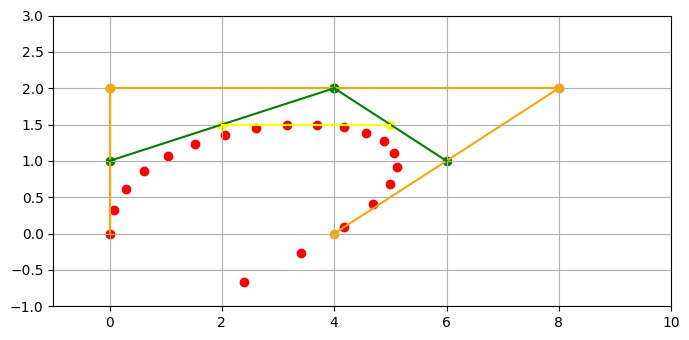

In [103]:
# ====================== Graficando los puntos y polinomios ======================

# Ajustes de la grafica
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.xlim(-1, 10)
plt.ylim(-1, 3)
plt.grid()
dotColor = ["orange","green","yellow",'gray']
for r in range(1,4):
  for i in range(0,4-r):
    plt.scatter(Px[r-1][i], Py[r-1][i], color= dotColor[r-1])
    plt.scatter(Px[r-1][i+1], Py[r-1][i+1], color= dotColor[r-1])
    plt.plot([Px[r-1][i], Px[r-1][i+1]],[Py[r-1][i], Py[r-1][i+1]], color = dotColor[r-1], linestyle="-")
t2 = symbols('t2')

for q in np.linspace(0, 4,70):
  plt.scatter( -20*q**3 + 24*q**2, -6*q**2 + 6*q , color= "red")

# plt.scatter()
# plot_parametric(((sin(x),cos(x))))
plt.show()